In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Dataset .csv')

In [3]:
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
print(data.shape)

(9551, 21)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
print(data.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

## Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

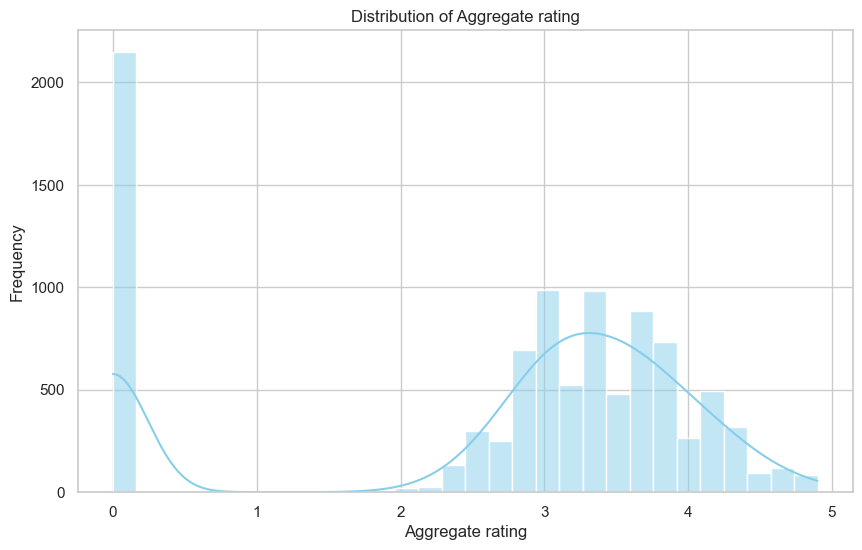

In [8]:
# Visualizing the distribution of Aggregate rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

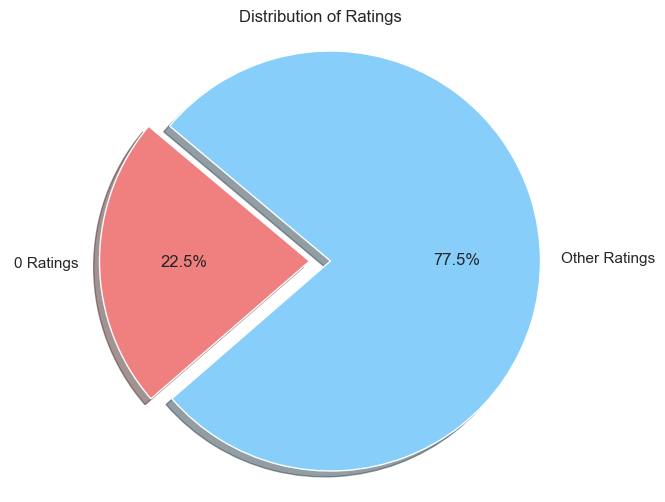

In [9]:
zero_ratings_count = data[data['Aggregate rating'] == 0].shape[0]
other_ratings_count = data[data['Aggregate rating'] != 0].shape[0]

labels = ['0 Ratings', 'Other Ratings']
sizes = [zero_ratings_count, other_ratings_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

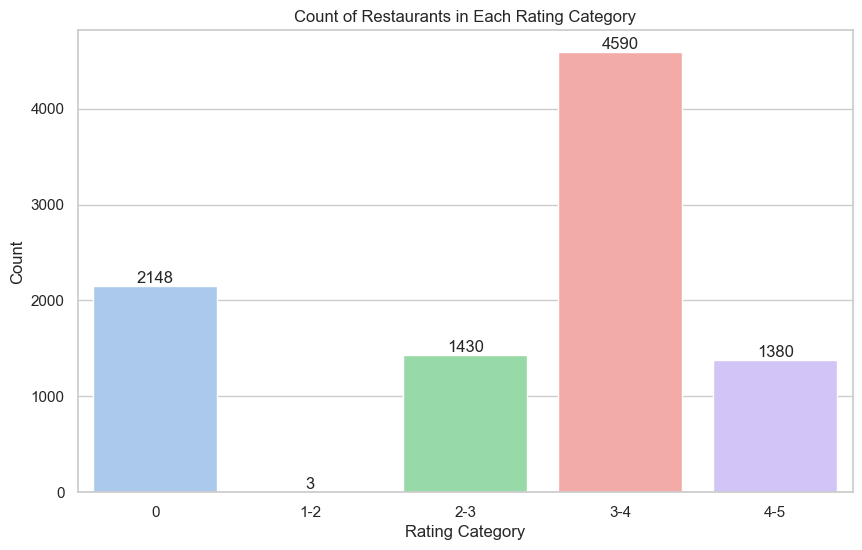

In [10]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0', '1-2', '2-3', '3-4', '4-5']

rating_category = pd.cut(data['Aggregate rating'], bins=bins, labels=labels, right=False)

rating_counts = rating_category.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='pastel', legend=False)

for i, count in enumerate(rating_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.title('Count of Restaurants in Each Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

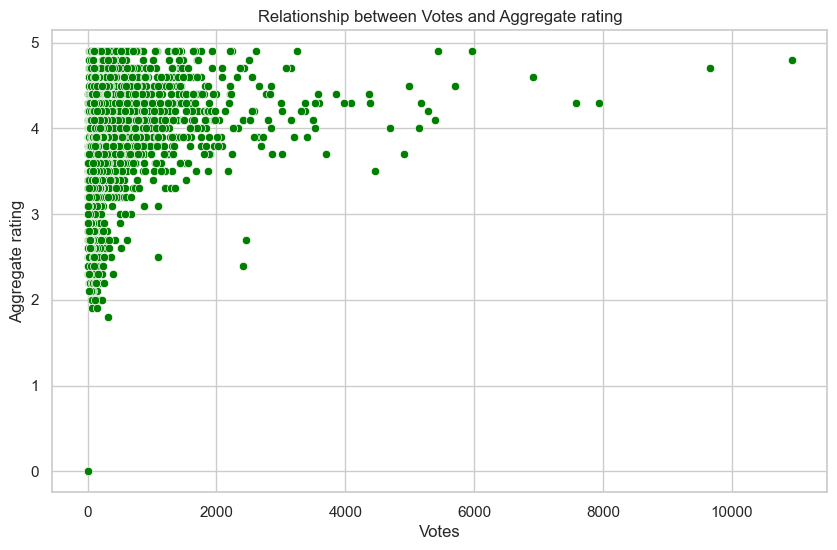

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data, color='green')
plt.title('Relationship between Votes and Aggregate rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

In [12]:
unique_price_range = data['Price range'].unique()
print("Unique values of Price range column:", unique_price_range)

Unique values of Price range column: [3 4 2 1]


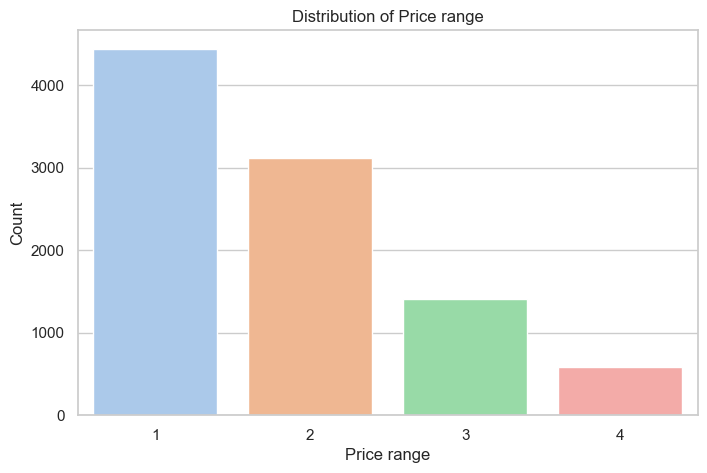

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Price range', data=data, hue='Price range', palette='pastel', legend=False)
plt.title('Distribution of Price range')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.show()

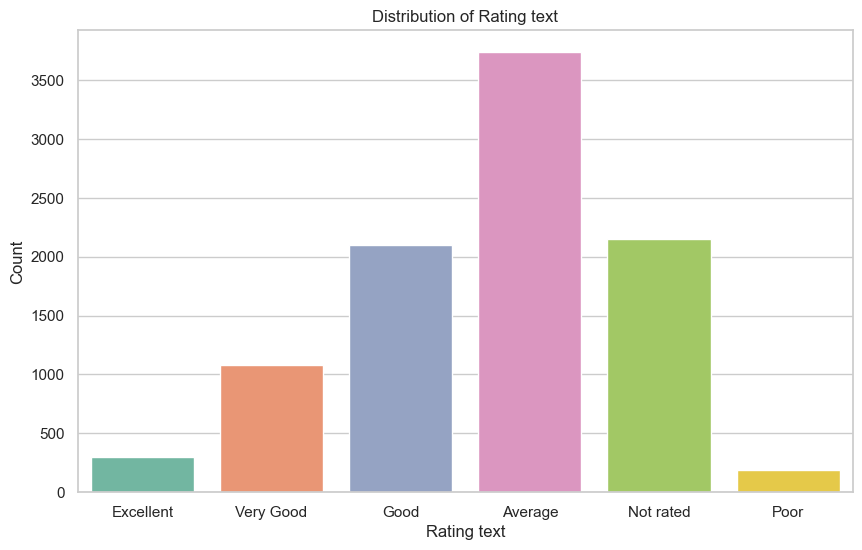

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating text', data=data, hue='Rating text', palette='Set2', legend=False)
plt.title('Distribution of Rating text')
plt.xlabel('Rating text')
plt.ylabel('Count')
plt.show()

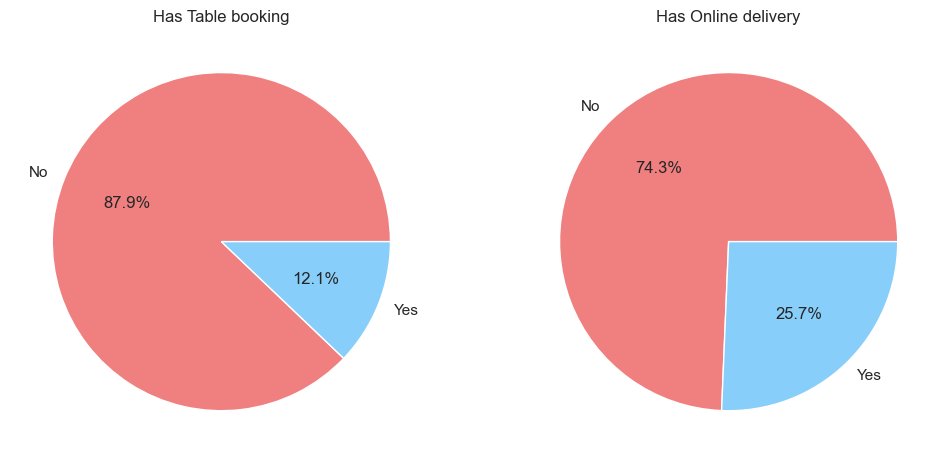

In [15]:
table_booking_counts = data['Has Table booking'].value_counts()
online_delivery_counts = data['Has Online delivery'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(table_booking_counts, labels=table_booking_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Has Table booking')

plt.subplot(1, 2, 2)
plt.pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Has Online delivery')

plt.show()

## Data Pre-processing

In [16]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [17]:
data.dropna(subset=['Cuisines'], inplace=True)

In [18]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [19]:
data.shape

(9542, 21)

In [20]:
for col in data.columns:
    print(f"Unique values for column '{col}':", len(data[col].unique()))

Unique values for column 'Restaurant ID': 9542
Unique values for column 'Restaurant Name': 7437
Unique values for column 'Country Code': 15
Unique values for column 'City': 140
Unique values for column 'Address': 8910
Unique values for column 'Locality': 1206
Unique values for column 'Locality Verbose': 1263
Unique values for column 'Longitude': 8111
Unique values for column 'Latitude': 8668
Unique values for column 'Cuisines': 1825
Unique values for column 'Average Cost for two': 140
Unique values for column 'Currency': 12
Unique values for column 'Has Table booking': 2
Unique values for column 'Has Online delivery': 2
Unique values for column 'Is delivering now': 2
Unique values for column 'Switch to order menu': 1
Unique values for column 'Price range': 4
Unique values for column 'Aggregate rating': 33
Unique values for column 'Rating color': 6
Unique values for column 'Rating text': 6
Unique values for column 'Votes': 1012


In [21]:
columns_to_remove = ['Restaurant ID','Restaurant Name','Address','Longitude','Latitude','Switch to order menu']
new_data = data.drop(columns_to_remove, axis=1)

In [22]:
new_data.shape

(9542, 15)

In [23]:
for col in new_data.columns:
    print(f"Unique values for column '{col}':", len(new_data[col].unique()))

Unique values for column 'Country Code': 15
Unique values for column 'City': 140
Unique values for column 'Locality': 1206
Unique values for column 'Locality Verbose': 1263
Unique values for column 'Cuisines': 1825
Unique values for column 'Average Cost for two': 140
Unique values for column 'Currency': 12
Unique values for column 'Has Table booking': 2
Unique values for column 'Has Online delivery': 2
Unique values for column 'Is delivering now': 2
Unique values for column 'Price range': 4
Unique values for column 'Aggregate rating': 33
Unique values for column 'Rating color': 6
Unique values for column 'Rating text': 6
Unique values for column 'Votes': 1012


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [46]:
binary_mapping = {
    'Yes': 1,
    'No': 0,
}

columns_to_binary_encode = ['Has Table booking', 'Has Online delivery', 'Is delivering now']

for col in columns_to_binary_encode:
    if col in new_data.columns:
        new_data[col] = new_data[col].map(binary_mapping)

print(new_data.head())

   Country Code  City  Locality  Locality Verbose  \
0           162    73       171               172   
1           162    73       592               600   
2           162    75       308               314   
3           162    75       860               873   
4           162    75       860               873   

                             Cuisines  Average Cost for two  Currency  \
0        [French, Japanese, Desserts]                  1100         0   
1                          [Japanese]                  1200         0   
2  [Seafood, Asian, Filipino, Indian]                  4000         0   
3                   [Japanese, Sushi]                  1500         0   
4                  [Japanese, Korean]                  1500         0   

   Has Table booking  Has Online delivery  Is delivering now  Price range  \
0                NaN                  NaN                NaN            3   
1                NaN                  NaN                NaN            3   
2          

In [26]:
from sklearn.preprocessing import LabelEncoder

columns_to_label_encode = ['City','Locality Verbose','Locality','Rating color', 'Rating text','Currency']

label_encoder = LabelEncoder()

for col in columns_to_label_encode:
    if col in new_data.columns:
        new_data[col] = label_encoder.fit_transform(new_data[col])

print(new_data.head())

   Country Code  City  Locality  Locality Verbose  \
0           162    73       171               172   
1           162    73       592               600   
2           162    75       308               314   
3           162    75       860               873   
4           162    75       860               873   

                           Cuisines  Average Cost for two  Currency  \
0        French, Japanese, Desserts                  1100         0   
1                          Japanese                  1200         0   
2  Seafood, Asian, Filipino, Indian                  4000         0   
3                   Japanese, Sushi                  1500         0   
4                  Japanese, Korean                  1500         0   

   Has Table booking  Has Online delivery  Is delivering now  Price range  \
0                  1                    0                  0            3   
1                  1                    0                  0            3   
2                  1   

In [27]:
new_data.isnull().sum()

Country Code            0
City                    0
Locality                0
Locality Verbose        0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

new_data['Cuisines'] = new_data['Cuisines'].str.split(', ')

cuisines_encoded = mlb.fit_transform(new_data['Cuisines'])
cuisines_encoded_df = pd.DataFrame(cuisines_encoded, columns=mlb.classes_)

df = pd.concat([new_data.drop('Cuisines', axis=1), cuisines_encoded_df], axis=1)
print(df.head())

   Country Code  City  Locality  Locality Verbose  Average Cost for two  \
0         162.0  73.0     171.0             172.0                1100.0   
1         162.0  73.0     592.0             600.0                1200.0   
2         162.0  75.0     308.0             314.0                4000.0   
3         162.0  75.0     860.0             873.0                1500.0   
4         162.0  75.0     860.0             873.0                1500.0   

   Currency  Has Table booking  Has Online delivery  Is delivering now  \
0       0.0                1.0                  0.0                0.0   
1       0.0                1.0                  0.0                0.0   
2       0.0                1.0                  0.0                0.0   
3       0.0                0.0                  0.0                0.0   
4       0.0                1.0                  0.0                0.0   

   Price range  ...  Teriyaki  Tex-Mex  Thai  Tibetan  Turkish  Turkish Pizza  \
0          3.0  ...    

In [29]:
df.isnull().sum()

Country Code            9
City                    9
Locality                9
Locality Verbose        9
Average Cost for two    9
                       ..
Turkish Pizza           9
Vegetarian              9
Vietnamese              9
Western                 9
World Cuisine           9
Length: 159, dtype: int64

In [30]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

      Country Code   City  Locality  Locality Verbose  Average Cost for two  \
9542         208.0  139.0     503.0             509.0                  80.0   
9543         208.0  139.0     516.0             522.0                  35.0   
9544         208.0  139.0     516.0             522.0                  40.0   
9545         208.0  139.0     516.0             522.0                  90.0   
9546         208.0  139.0     516.0             522.0                  80.0   
9547         208.0  139.0     551.0             557.0                 105.0   
9548         208.0  139.0     553.0             560.0                 170.0   
9549         208.0  139.0     553.0             560.0                 120.0   
9550         208.0  139.0     668.0             679.0                  55.0   
84             NaN    NaN       NaN               NaN                   NaN   
87             NaN    NaN       NaN               NaN                   NaN   
94             NaN    NaN       NaN               Na

In [31]:
df = df.dropna()

In [32]:
print("Pre-processed Dataset Shape : ",df.shape)

Pre-processed Dataset Shape :  (9533, 159)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9533 entries, 0 to 9541
Columns: 159 entries, Country Code to World Cuisine
dtypes: float64(159)
memory usage: 11.6 MB


## Model Training

In [34]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7626, 158)
Shape of X_test: (1907, 158)
Shape of y_train: (7626,)
Shape of y_test: (1907,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regression": KNeighborsRegressor()
}

In [37]:
model_names = []
mse_scores = []
mae_scores = []
r2_scores = []

In [38]:
for name, model in models.items():
    model_names.append(name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

In [39]:
results_df = pd.DataFrame({
    "Model": model_names,
    "Mean Squared Error": mse_scores,
    "Mean Absolute Error": mae_scores,
    "R-squared": r2_scores
})

In [40]:
from IPython.display import display, Markdown
display(results_df)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,1.238354,0.927718,0.459213
1,Decision Tree Regression,0.056340,0.149449,0.975397
2,Random Forest Regression,0.032688,0.122963,0.985725
3,Gradient Boosting Regression,0.031793,0.123775,0.986116
4,SVR,2.259472,0.988931,0.013292
5,KNN Regression,0.845573,0.620388,0.630740


## Most Influential Features

In [41]:
rf_importance = models["Random Forest Regression"].feature_importances_

rf_feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance (Random Forest)": rf_importance
})

rf_feature_importance_df = rf_feature_importance_df.sort_values(by="Importance (Random Forest)", ascending=False)

In [42]:
from sklearn.inspection import permutation_importance

gb_result = permutation_importance(models["Gradient Boosting Regression"], X_test, y_test, n_repeats=10, random_state=42)
gb_importance = gb_result.importances_mean

gb_feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance (Gradient Boosting)": gb_importance
})

gb_feature_importance_df = gb_feature_importance_df.sort_values(by="Importance (Gradient Boosting)", ascending=False)

In [43]:
top_10_rf_features = rf_feature_importance_df.head(10)

top_10_rf_features.columns = ["Feature", "Importance (Random Forest)"]

display(Markdown("**Top 10 Important Features (Random Forest Regression):**"))
display(top_10_rf_features)

**Top 10 Important Features (Random Forest Regression):**

,Feature,Importance (Random Forest)
12,Votes,0.902747
10,Rating color,0.078154
11,Rating text,0.008915
4,Average Cost for two,0.001702
3,Locality Verbose,0.001474
2,Locality,0.001451
1,City,0.000862
7,Has Online delivery,0.000360
47,Chinese,0.000325
113,North Indian,0.000322


In [44]:
top_10_gb_features = gb_feature_importance_df.head(10)

top_10_gb_features.columns = ["Feature", "Importance (Gradient Boosting)"]

display(Markdown("**Top 10 Important Features (Gradient Boosting Regression):**"))
display(top_10_gb_features)

**Top 10 Important Features (Gradient Boosting Regression):**

,Feature,Importance (Gradient Boosting)
12,Votes,1.532694
10,Rating color,0.189617
11,Rating text,0.017666
1,City,0.000445
4,Average Cost for two,0.000161
7,Has Online delivery,0.000127
0,Country Code,0.000121
9,Price range,0.000071
126,Raw Meats,0.000050
3,Locality Verbose,0.000023


In [45]:
merged_side_by_side = pd.merge(top_10_rf_features, top_10_gb_features)

display(Markdown("**Top Common Features (Random Forest vs. Gradient Boosting Regression):**"))
display(merged_side_by_side)

**Top Common Features (Random Forest vs. Gradient Boosting Regression):**

,Feature,Importance (Random Forest),Importance (Gradient Boosting)
0,Votes,0.902747,1.532694
1,Rating color,0.078154,0.189617
2,Rating text,0.008915,0.017666
3,Average Cost for two,0.001702,0.000161
4,Locality Verbose,0.001474,0.000023
5,City,0.000862,0.000445
6,Has Online delivery,0.000360,0.000127
